# Graph resonators

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import string
import replicator_dynamics as rd
import pandas as pd
import seaborn as sns
# import resonator_circuit as rc
import graph_tools as gt
%load_ext autoreload
%autoreload 2

In [2]:
alphabet = string.ascii_lowercase

### Generate motifs

In [3]:
motifs = gt.group_motifs(motif_size=4)

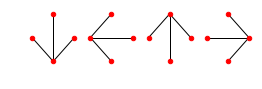

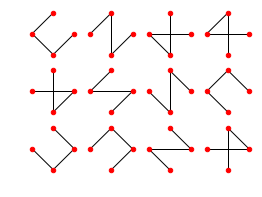

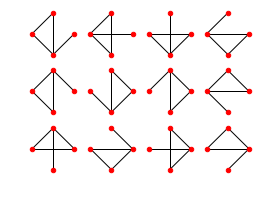

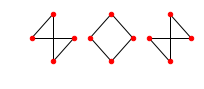

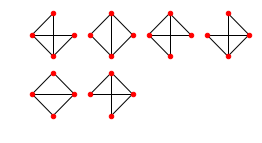

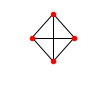

In [4]:
gt.plot_motifs(motifs)

### Choose pair of isomorphic graphs

In [9]:
aj1 = motifs[0][0]
aj2 = motifs[0][1]

In [10]:
G1 = nx.from_numpy_matrix(aj1)
G1 = nx.relabel_nodes(G1, {x:alphabet[x] for x in np.arange(len(G1))})
G2 = nx.from_numpy_matrix(aj2)
G2 = nx.relabel_nodes(G2, {x:alphabet[-x-1] for x in np.arange(len(G2))})

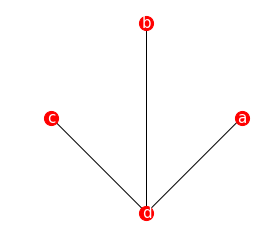

In [11]:
gt.draw_graph(G1)

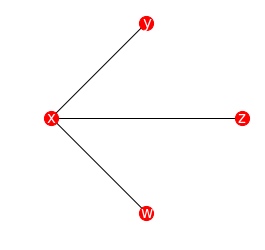

In [12]:
gt.draw_graph(G2)

## Isomorphism via replicator dynamics

### Generate association graph

In [13]:
AG, am, labels = gt.association_graph(G1, G2)

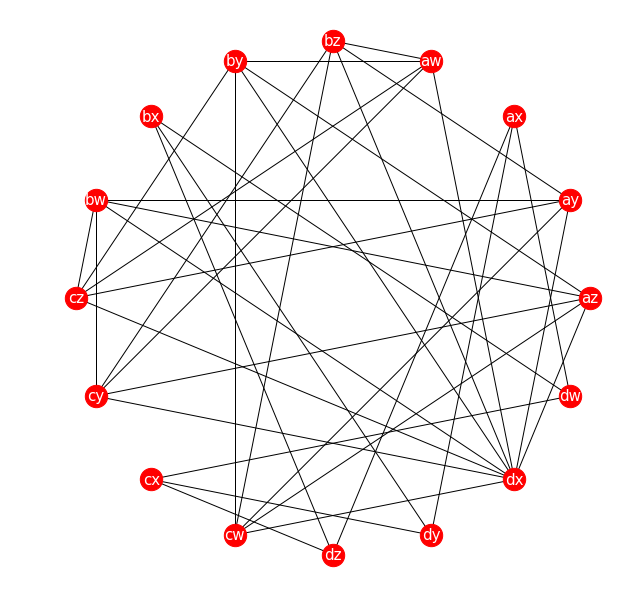

In [54]:
gt.draw_graph(AG, size=8, node_size=500)

In [22]:
xs, x = rd.run_dynamics(am)

48 iterations


/Users/Sophia/py3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


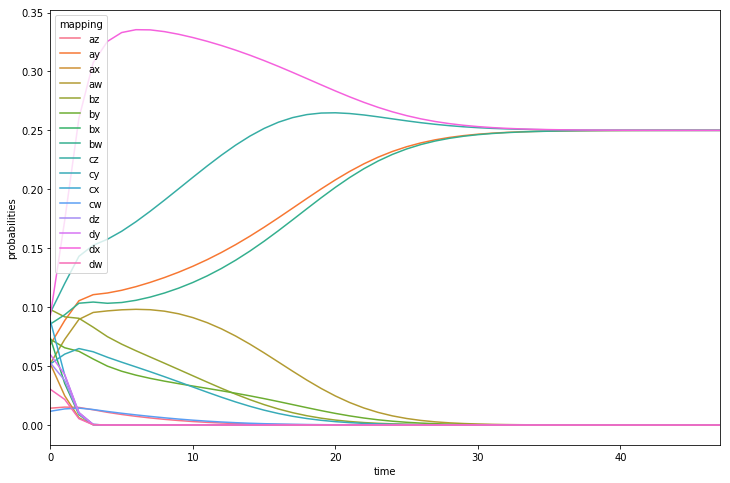

In [26]:
rd.plot_resonator_dynamics(xs, AG)

In [44]:
max_clique = [list(AG.nodes())[i] for i in range(len(x)) if x[i] >= 1/len(G1) - .1/len(G1)]

In [46]:
MC = AG.subgraph(max_clique)

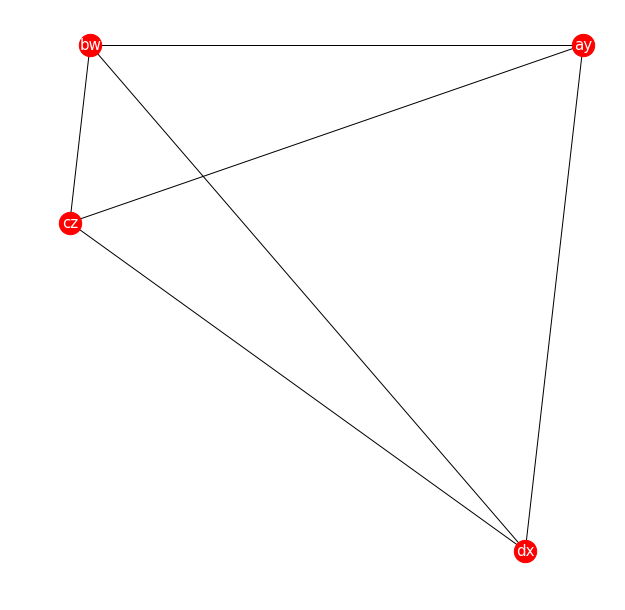

In [52]:
plt.figure(figsize=(8,8))
pos = nx.drawing.layout.circular_layout(AG)
nx.draw(MC, pos, node_size=500, with_labels=True, font_size=15, font_color='white')

### Success!